In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/temperatures.csv')
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [ ]:
#to view overrall details of dataset such as if dataset has null values, data types etc
df.info()
#Splitting dataset into training(80%) and testing(20%)
train_df=df[1:94]
print("Train Dataset\n")
print(train_df)
print("Test Dataset\n")
test_df=df[94:]
print(test_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     117 non-null    int64  
 1   JAN      117 non-null    float64
 2   FEB      117 non-null    float64
 3   MAR      117 non-null    float64
 4   APR      117 non-null    float64
 5   MAY      117 non-null    float64
 6   JUN      117 non-null    float64
 7   JUL      117 non-null    float64
 8   AUG      117 non-null    float64
 9   SEP      117 non-null    float64
 10  OCT      117 non-null    float64
 11  NOV      117 non-null    float64
 12  DEC      117 non-null    float64
 13  ANNUAL   117 non-null    float64
 14  JAN-FEB  117 non-null    float64
 15  MAR-MAY  117 non-null    float64
 16  JUN-SEP  117 non-null    float64
 17  OCT-DEC  117 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 16.6 KB
Train Dataset

    YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    

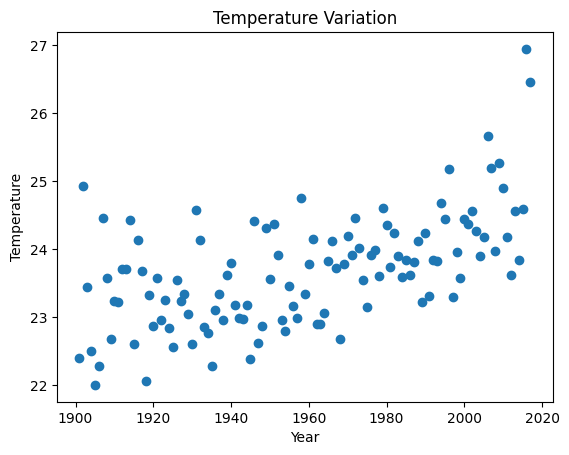

In [ ]:
plt.scatter(df['YEAR'],df['JAN'])
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature Variation')
plt.show()

**REGRESSION**

*LINEAR REGRESSION*

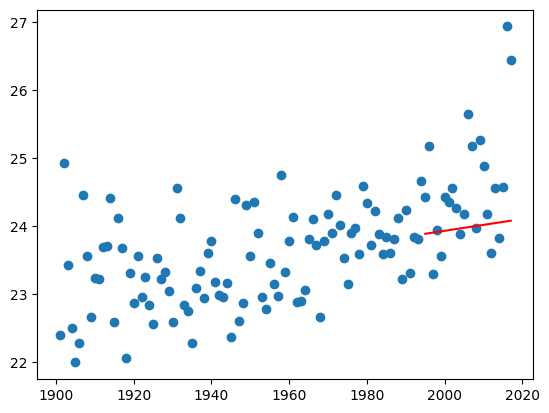

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
#Reshape as model.fit()'s x_train should be in 2d form
X_train = train_df['YEAR'].values.reshape(-1, 1)
y_train = train_df['JAN']
#Train the model
model.fit(X_train, y_train)
#Reshape the test data
X_test = test_df['YEAR'].values.reshape(-1, 1)
#Make predictions on the test data
predictions = model.predict(X_test)
#Plot the entire dataset
plt.scatter(df['YEAR'],df['JAN'])
#Show predictions on the above scatter plot
plt.plot(test_df['YEAR'], predictions,color='red')

*POLYNOMIAL REGRESSION*

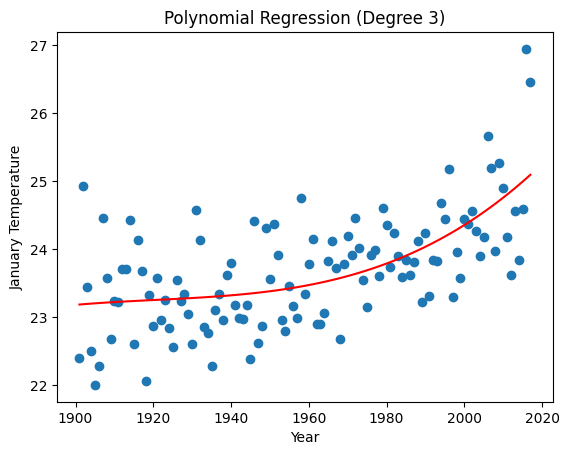

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
X = df[['YEAR']]
y = df['JAN']
#y = b₀ + b₁x + b₂x² + ... + bₙxⁿ equation for polynomial regression
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
predictions = model.predict(X_poly)
plt.scatter(X, y)
plt.plot(X, predictions, color='red')
plt.xlabel('Year')
plt.ylabel('January Temperature')
plt.title('Polynomial Regression (Degree {})'.format(degree))
plt.show()

*RANDOM FOREST*

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['YEAR']]
y = df['JAN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
predictions = rf_regressor.predict(X_test)
#Rounding off predictions to 2 decimal points
for i in range(0,len(predictions)):
  predictions[i]=round(predictions[i], 2)
print('Years to Predict Predicted Value Actual value')
for i in range(0,20):
  print(X_test['YEAR'].iloc[i],"\t\t",predictions[i],"\t\t",y_test.iloc[i])
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Years to Predict Predicted Value Actual value
1945 		 23.46 		 22.38
1905 		 22.57 		 22.0
1954 		 23.18 		 22.79
1943 		 23.12 		 22.97
1911 		 23.09 		 23.22
1986 		 23.8 		 23.61
1973 		 24.14 		 24.02
1995 		 24.31 		 24.44
1937 		 23.01 		 23.34
1912 		 23.51 		 23.7
1941 		 23.57 		 23.18
1927 		 23.38 		 23.23
1996 		 23.65 		 25.18
2005 		 24.39 		 24.18
1919 		 22.53 		 23.32
1901 		 24.18 		 22.4
1963 		 23.16 		 22.9
2013 		 23.77 		 24.56
1977 		 23.8 		 23.98
2002 		 24.31 		 24.56
Mean Squared Error: 0.6085875000000008


**CLASSIFICATION**

*LOGISTIC REGRESSION*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[['YEAR']]
y = df['JAN'] < 24
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Years to Predict Predicted class Actual class')
for i in range(0,20):
  print(X_test['YEAR'].iloc[i],"\t\t",predictions[i],"\t\t",y_test.iloc[i])
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Years to Predict Predicted class Actual class
1945 		 True 		 True
1905 		 True 		 True
1954 		 True 		 True
1943 		 True 		 True
1911 		 True 		 True
1986 		 True 		 True
1973 		 True 		 False
1995 		 True 		 False
1937 		 True 		 True
1912 		 True 		 True
1941 		 True 		 True
1927 		 True 		 True
1996 		 True 		 False
2005 		 True 		 False
1919 		 True 		 True
1901 		 True 		 True
1963 		 True 		 True
2013 		 True 		 False
1977 		 True 		 True
2002 		 True 		 False
Accuracy: 0.6666666666666666


*KNN Classifier*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
threshold = 24
X = df[['YEAR']]
y = df['JAN'] < threshold  #Only cold values
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Initialize KNN classifier neighbors were taken as 5 as it provided the best result for the above
classifier = KNeighborsClassifier(n_neighbors=5)
#Train the classifier
classifier.fit(X_train, y_train)
#Make predictions True means cold False means Hot
predictions = classifier.predict(X_test)
print('Years to Predict Predicted class Actual class')
for i in range(0,len(X_test['YEAR'])):
  print(X_test['YEAR'].iloc[i],"\t\t",predictions[i],"\t\t",y_test.iloc[i])
#Evaluate the classifier
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Years to Predict Predicted class Actual class
1945 		 True 		 True
1905 		 True 		 True
1954 		 True 		 True
1943 		 True 		 True
1911 		 True 		 True
1986 		 True 		 True
1973 		 True 		 False
1995 		 True 		 False
1937 		 True 		 True
1912 		 True 		 True
1941 		 True 		 True
1927 		 True 		 True
1996 		 True 		 False
2005 		 False 		 False
1919 		 True 		 True
1901 		 True 		 True
1963 		 True 		 True
2013 		 False 		 False
1977 		 True 		 True
2002 		 False 		 False
1969 		 True 		 True
1990 		 True 		 False
2016 		 False 		 False
1913 		 True 		 True
Accuracy: 0.8333333333333334


*DECISION TREE*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

threshold = 24
X = df[['YEAR']]
y = df['JAN'] < threshold

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
prediction=classifier.predict(X_test)
print('Years to Predict Predicted class Actual class')
for i in range(0,len(X_test['YEAR'])):
  print(X_test['YEAR'].iloc[i],"\t\t",prediction[i],"\t\t",y_test.iloc[i])
accuracy=accuracy_score(y_test,prediction)
print("Accuracy:",accuracy)

Years to Predict Predicted class Actual class
1945 		 True 		 True
1905 		 True 		 True
1954 		 True 		 True
1943 		 True 		 True
1911 		 True 		 True
1986 		 True 		 True
1973 		 False 		 False
1995 		 False 		 False
1937 		 True 		 True
1912 		 True 		 True
1941 		 True 		 True
1927 		 True 		 True
1996 		 True 		 False
2005 		 True 		 False
1919 		 True 		 True
1901 		 False 		 True
1963 		 True 		 True
2013 		 True 		 False
1977 		 True 		 True
2002 		 False 		 False
1969 		 True 		 True
1990 		 True 		 False
2016 		 False 		 False
1913 		 False 		 True
Accuracy: 0.75
